## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm, lognorm, uniform

In [2]:
print("Yfinance version: " , yf.__version__)

Yfinance version:  0.2.37


In [3]:
# Set default parameters for plt.title()
plt.rcParams['axes.titlepad'] = 12  # Set padding around the title
plt.rcParams['axes.titleweight'] = 'normal'  # Set title font size
plt.rcParams['axes.titlesize'] = 9  # Set title font size

## Fetch cotation data

In [4]:
def fetch_stock_data(tickers, start_date, end_date, interval):
    data = yf.download(tickers, start=start_date, end=end_date, interval=interval)
    return data

In [5]:
# select tickers
tickers = ["BRK-B", "IAU", "MSFT", "GOOG"] #GOOG, AMZN, AAPL, TSM, BAC, WFC, VALE, KO, JNJ, DG, DIS, SPY 

# date format YYYY-MM-DD
start_date = "2010-01-01"
end_date = "2024-02-01"

# time interval to take the cotations, in this case monthly
interval= "1d"

stock_data = fetch_stock_data(tickers, start_date, end_date, interval)

display(stock_data)

[*********************100%%**********************]  4 of 4 completed


Price        Adj Close                                          Close  \
Ticker           BRK-B        GOOG        IAU        MSFT       BRK-B   
Date                                                                    
2010-01-04   66.220001   15.610239  21.978001   23.431589   66.220001   
2010-01-05   66.540001   15.541497  21.954000   23.439163   66.540001   
2010-01-06   66.199997   15.149715  22.326000   23.295319   66.199997   
2010-01-07   66.459999   14.797037  22.181999   23.053057   66.459999   
2010-01-08   66.440002   14.994298  22.290001   23.212038   66.440002   
...                ...         ...        ...         ...         ...   
2024-01-25  380.850006  153.639999  38.230000  404.122681  380.850006   
2024-01-26  385.399994  153.789993  38.180000  403.184418  385.399994   
2024-01-29  383.179993  154.839996  38.459999  408.963715  383.179993   
2024-01-30  387.149994  153.050003  38.509998  407.835815  387.149994   
2024-01-31  383.739990  141.800003  38.490002  396.846130  383.739990   

Price                                                High              ...  \
Ticker            GOOG        IAU        MSFT       BRK-B        GOOG  ...   
Date                                                                   ...   
2010-01-04   15.610239  21.978001   30.950001   66.500000   15.678981  ...   
2010-01-05   15.541497  21.954000   30.959999   66.589996   15.637387  ...   
2010-01-06   15.149715  22.326000   30.770000   66.500000   15.588072  ...   
2010-01-07   14.797037  22.181999   30.450001   66.510002   15.193053  ...   
2010-01-08   14.994298  22.290001   30.660000   66.480003   15.024933  ...   
...                ...        ...         ...         ...         ...  ...   
2024-01-25  153.639999  38.230000  404.869995  380.989990  154.759995  ...   
2024-01-26  153.789993  38.180000  403.929993  385.730011  154.110001  ...   
2024-01-29  154.839996  38.459999  409.720001  385.700012  155.199997  ...   
2024-01-30  153.050003  38.509998  408.589996  387.640015  155.039993  ...   
2024-01-31  141.800003  38.490002  397.579987  387.920013  145.589996  ...   

Price             Low                    Open                         \
Ticker            IAU        MSFT       BRK-B        GOOG        IAU   
Date                                                                   
2010-01-04  21.882000   30.590000   66.000000   15.615220  21.978001   
2010-01-05  21.870001   30.639999   66.389999   15.620949  21.988001   
2010-01-06  22.110001   30.520000   66.500000   15.588072  22.156000   
2010-01-07  22.152000   30.190001   66.199997   15.178109  22.230000   
2010-01-08  22.077999   30.240000   66.480003   14.744733  22.306000   
...               ...         ...         ...         ...        ...   
2024-01-25  38.080002  402.529999  379.239990  151.740005  38.270000   
2024-01-26  38.139999  402.429993  381.049988  152.869995  38.250000   
2024-01-29  38.240002  404.329987  385.489990  153.639999  38.459999   
2024-01-30  38.389999  406.450012  383.239990  154.009995  38.740002   
2024-01-31  38.419998  397.209991  386.529999  145.389999  38.669998   

Price                    Volume                                
Ticker            MSFT    BRK-B       GOOG      IAU      MSFT  
Date                                                           
2010-01-04   30.620001  1575000   78541293  1185000  38409100  
2010-01-05   30.850000  1310000  120638494   936000  49749600  
2010-01-06   30.879999  1760000  159744526  1091000  58182400  
2010-01-07   30.629999  1505000  257533695   811500  50559700  
2010-01-08   30.280001  1500000  189680313   737000  51197400  
...                ...      ...        ...      ...       ...  
2024-01-25  404.320007  4055800   21495100  4637800  21021200  
2024-01-26  404.369995  3621400   19494500  3288100  17803300  
2024-01-29  406.059998  3797400   20909300  3503900  24510200  
2024-01-30  412.260010  3090900   26578900  4125600  33477600  
2024-01-31  406.959991  3856400   43908600 

In [6]:
# select only the closing price
df_close = stock_data.Close.copy()
df_close.info()
df_close

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3543 entries, 2010-01-04 to 2024-01-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BRK-B   3543 non-null   float64
 1   GOOG    3543 non-null   float64
 2   IAU     3543 non-null   float64
 3   MSFT    3543 non-null   float64
dtypes: float64(4)
memory usage: 138.4 KB


Ticker,BRK-B,GOOG,IAU,MSFT
Date,,,,
2010-01-04,66.220001,15.610239,21.978001,30.950001
2010-01-05,66.540001,15.541497,21.954000,30.959999
2010-01-06,66.199997,15.149715,22.326000,30.770000
2010-01-07,66.459999,14.797037,22.181999,30.450001
2010-01-08,66.440002,14.994298,22.290001,30.660000
...,...,...,...,...
2024-01-25,380.850006,153.639999,38.230000,404.869995
2024-01-26,385.399994,153.789993,38.180000,403.929993
2024-01-29,383.179993,154.839996,38.459999,409.720001


## Calculate returns

### Year-over-Year Return (YoY)

In [7]:
returns_daily = (df_close
                 .copy()
                 .pct_change(periods=252)
                 .dropna()
)

# display(returns_daily.describe())
returns_daily.head(3)

Ticker,BRK-B,GOOG,IAU,MSFT
Date,,,,
2011-01-03,0.214286,-0.035740,0.257621,-0.095961
2011-01-04,0.204839,-0.035049,0.229844,-0.092700
2011-01-05,0.222206,0.001332,0.205769,-0.090023


## Fit distribution model - Returns

In [8]:
def calculate_return_params(key):
    sigma, loc, scale = lognorm.fit(returns_daily[key] + 1.0)    
    return (sigma, loc, scale)

In [9]:
# Defining return dict to receive the fitting parameters from distributions
params = ("sigma", "loc", "scale")
return_fitting_params_lognormal = { key: dict( zip( params, calculate_return_params(key)) ) for key in tickers }

In [10]:
# return_fitting_params_lognormal

## Return plots

### Lognormal:

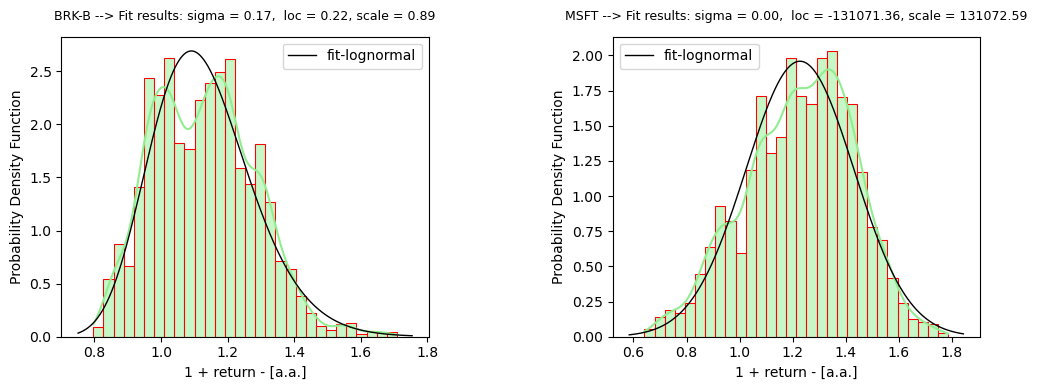

In [11]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
tick0 = tickers[0]
tick1 = tickers[2]
# Fit a Gaussian distribution to the returns_daily
plt.subplot(1, 2, 1)
data = returns_daily[tick0] + 1.0
sns.histplot(data= data, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = lognorm.pdf(x, return_fitting_params_lognormal[tick0]["sigma"], loc= return_fitting_params_lognormal[tick0]["loc"], scale= return_fitting_params_lognormal[tick0]["scale"])

plt.plot(x, p, 'k', label="fit-lognormal", linewidth=1)
plt.title(f"{tick0} --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (return_fitting_params_lognormal[tick0]["sigma"],
                                                                                      return_fitting_params_lognormal[tick0]["loc"],
                                                                                      return_fitting_params_lognormal[tick0]["scale"]))
plt.ylabel("Probability Density Function")
plt.xlabel("1 + return - [a.a.]")
plt.legend()


# Fit a Gaussian distribution to the returns_daily
plt.subplot(1, 2, 2)
data = returns_daily[tick1] + 1.0
sns.histplot(data= data, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = lognorm.pdf(x, return_fitting_params_lognormal[tick1]["sigma"], loc= return_fitting_params_lognormal[tick1]["loc"], scale= return_fitting_params_lognormal[tick1]["scale"])

plt.plot(x, p, 'k', label="fit-lognormal", linewidth=1)
plt.title(f"{tick1} --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (return_fitting_params_lognormal[tick1]["sigma"],
                                                                                      return_fitting_params_lognormal[tick1]["loc"],
                                                                                      return_fitting_params_lognormal[tick1]["scale"]))
plt.ylabel("Probability Density Function")
plt.xlabel("1 + return - [a.a.]")
plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

## Generate samples from distributions models

In [12]:
# Number of samples
num_samples = 1_000

In [13]:
def calculate_return_samples(ticker, num_samples=1_000):
    sigma   = return_fitting_params_lognormal[ticker]["sigma"]
    loc     = return_fitting_params_lognormal[ticker]["loc"]
    scale   = return_fitting_params_lognormal[ticker]["scale"]
    samples = lognorm.rvs(sigma, loc=loc, scale=scale, size=num_samples) - 1.0
    return samples

# Defining return dict to receive the samples from distributions models builted with their respective parameters
return_samples_lognormal = { ticker: calculate_return_samples(ticker, num_samples) for ticker in tickers }


## Plot - Compare data vs model

### Returns:

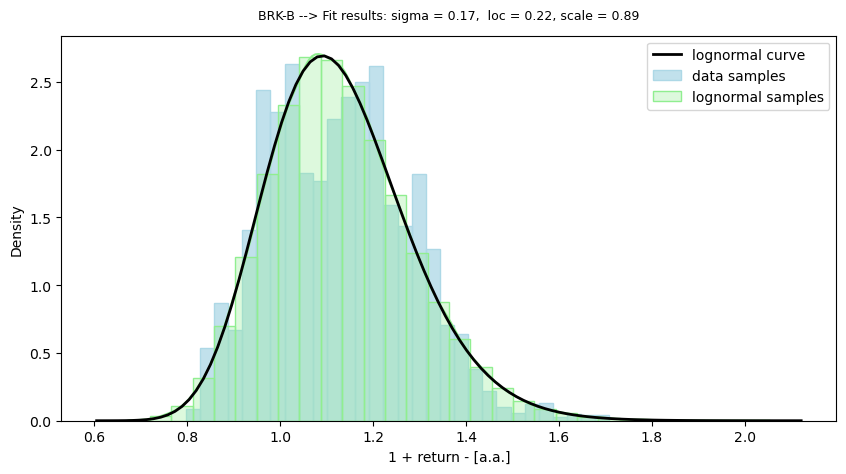

In [14]:
# Find the best parameters when fitting the model to the data
data = returns_daily[tickers[0]] + 1.0
sigma, loc, scale = lognorm.fit(data)

# Generate samples based on the parameters find previously
n_samples = 100_000
samples = lognorm.rvs(sigma, loc=loc, scale=scale, size=n_samples)

# Plot the histogram of the generated samples
plt.figure(figsize=(10,5))
sns.histplot(data, bins=30, stat="density", color='lightblue', edgecolor='lightblue', label="data samples")
sns.histplot(samples, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='lightgreen', alpha=0.3, label="lognormal samples")

# Plot the PDF of the lognormal distribution for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', linewidth=2, label="lognormal curve")
plt.title(f"{tickers[0]} --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Density")
plt.xlabel("1 + return - [a.a.]")
plt.legend()
plt.show()

## Monte carlo simulation

### Equations:
<br>

- **Portfolio Return**:
<br>
$$ R_P = {\omega}^T \cdot R $$
<br>
with $R_P$ being the return of the portfolio, $\omega$ the weights and $R$ the returns of the assets. Each one are given by:
<br><br>

<table>
  <tr>
    <td>
      $$
        \omega = \begin{bmatrix}
                {\omega}_A \\
                {\omega}_B \\
                {\omega}_C \\
        \end{bmatrix},
      $$
    </td>
    <td>
      and
    </td>
    <td>
    $$
        R = \begin{bmatrix}
                R_A \\
                R_B \\
                R_C \\
        \end{bmatrix}.
    $$
    </td>
  </tr>
</table>

<br>

- **Portfolio Risk**: 
<br>
$$ {{\sigma}^2_P} = {\omega}^T \cdot \Sigma \cdot \omega $$
<br>
in wich ${{\sigma}^2_P}$ is the variance of the portfolio and $\Sigma$ is the covariance matrix of the assets. The covariance matrix is given by:
<br>
<br>
$$ \Sigma = \begin{bmatrix}
                {{\sigma}^2_A} & cov(A,B) & cov(A,C) \\
                cov(A,B) & {{\sigma}^2_B} & cov(B,C) \\
                cov(A,C) & cov(B,C) & {{\sigma}^2_C} \\
            \end{bmatrix}.
$$
<br>




## Generate asset weights

In [15]:
def make_wight_matrix(n_tickers, n_samples=1_000):
    rand_values = uniform.rvs(size= int(n_tickers * n_samples)).reshape((n_tickers, n_samples))
    normalized_values = rand_values / rand_values.sum(axis=0, keepdims=True)
    return normalized_values

# Matrix of the weights
weight_matrix = make_wight_matrix(len(tickers), num_samples)
weight_matrix.shape

(4, 1000)

## Build Assets Return Matrix

In [16]:
# Create empty array with the final shape
assets_return_matrix = np.zeros((len(tickers), num_samples), dtype=np.float64)

# Map the values in the dictionary to the new array
for row, ticker in zip(range(len(tickers)), tickers):
    assets_return_matrix[row, :] = return_samples_lognormal[ticker].reshape(1, num_samples)

assets_return_matrix[:, :5]

array([[ 0.1014917 ,  0.20303024, -0.01569645,  0.66586696,  0.07172532],
       [ 0.09890527,  0.06101165, -0.11693893, -0.08572564, -0.00853854],
       [ 0.65595217,  0.37905237,  0.08077289, -0.08114626,  0.04893055],
       [-0.14045985,  0.62563946,  0.38490931,  0.0251564 , -0.18960001]])

## Portfolio Return

In [26]:
# # Matrix of the returns
portfolio_return = weight_matrix.T.dot(assets_return_matrix).reshape(-1)
portfolio_return.shape

(1000000,)

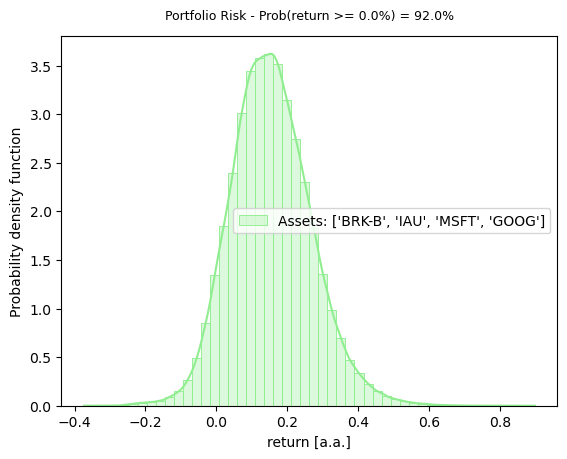

In [30]:
# Plot
sns.histplot(portfolio_return, bins=50, stat="density", kde=True, color='lightgreen', edgecolor='lightgreen', alpha=0.3, label=f"Assets: {tickers}")

threshold = 0.0
return_threshold = np.count_nonzero(portfolio_return > threshold) / np.max(portfolio_return.shape)

plt.title(f"Portfolio Risk - Prob(return >= {threshold}%) = {int(100 * return_threshold)}.0%")
plt.ylabel("Probability density function")
plt.xlabel("return [a.a.]")
plt.legend()
plt.show()